In [1]:
import torch
import torch.nn as nn
from torch.optim import AdamW
import matplotlib.pyplot as plt

from src.train_utils import train
from src.data_utils import get_cifar10_dataloaders
from src.vit import ViT
from src.cct import CCT

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

train_loader, test_loader = get_cifar10_dataloaders(batch_size=128)

Using device: cpu
Files already downloaded and verified
Files already downloaded and verified


In [2]:
patch_size = 4
hidden_dim = 128
n_heads = 4
n_layers = 4
n_classes = 10
dropout_rate = 0.1
positional_encoding = "sinusoidal"
num_epochs_vit = 25

vit_model = ViT(
    patch_size=patch_size,
    hidden_dim=hidden_dim,
    n_heads=n_heads,
    n_layers=n_layers,
    n_classes=n_classes,
    dropout_rate=dropout_rate,
    positional_encoding=positional_encoding,
    max_len=1000
).to(device)

criterion_vit = nn.CrossEntropyLoss()
optimizer_vit = AdamW(vit_model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_vit = torch.optim.lr_scheduler.StepLR(optimizer_vit, step_size=10, gamma=0.1)

vit_checkpoint_path = "models/vit_checkpoint.pth"
train_losses_vit, train_acc_vit, test_losses_vit, test_acc_vit = train(
    model=vit_model,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion_vit,
    optimizer=optimizer_vit,
    scheduler=scheduler_vit,
    device=device,
    num_epochs=num_epochs_vit,
    checkpoint_path=vit_checkpoint_path
)

[INFO] Found checkpoint models/vit_checkpoint.pth. Loading...
[INFO] Model was fully trained up to epoch 25.
       Skipping training and returning existing logs.
       Last Accuracy: 70.79%



/Users/tdonze/Desktop/VisionTransformer/src/train_utils.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=torch.devi

In [3]:
n_conv_layers = 2
kernel_size = 3
n_transformer_layers = 4
hidden_dim_cct = 128
n_heads_cct = 4
n_classes_cct = 10
dropout_rate_cct = 0.1
num_epochs_cct = 25

cct_model = CCT(
    n_conv_layers=n_conv_layers,
    kernel_size=kernel_size,
    n_transformer_layers=n_transformer_layers,
    hidden_dim=hidden_dim_cct,
    n_heads=n_heads_cct,
    n_classes=n_classes_cct,
    dropout_rate=dropout_rate_cct
).to(device)

criterion_cct = nn.CrossEntropyLoss()
optimizer_cct = AdamW(cct_model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_cct = torch.optim.lr_scheduler.StepLR(optimizer_cct, step_size=10, gamma=0.1)

cct_checkpoint_path = "models/cct_checkpoint.pth"
train_losses_cct, train_acc_cct, test_losses_cct, test_acc_cct = train(
    model=cct_model,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion_cct,
    optimizer=optimizer_cct,
    scheduler=scheduler_cct,
    device=device,
    num_epochs=num_epochs_cct,
    checkpoint_path=cct_checkpoint_path
)

[INFO] Found checkpoint models/cct_checkpoint.pth. Loading...
[INFO] Model was fully trained up to epoch 25.
       Skipping training and returning existing logs.
       Last Accuracy: 81.23%



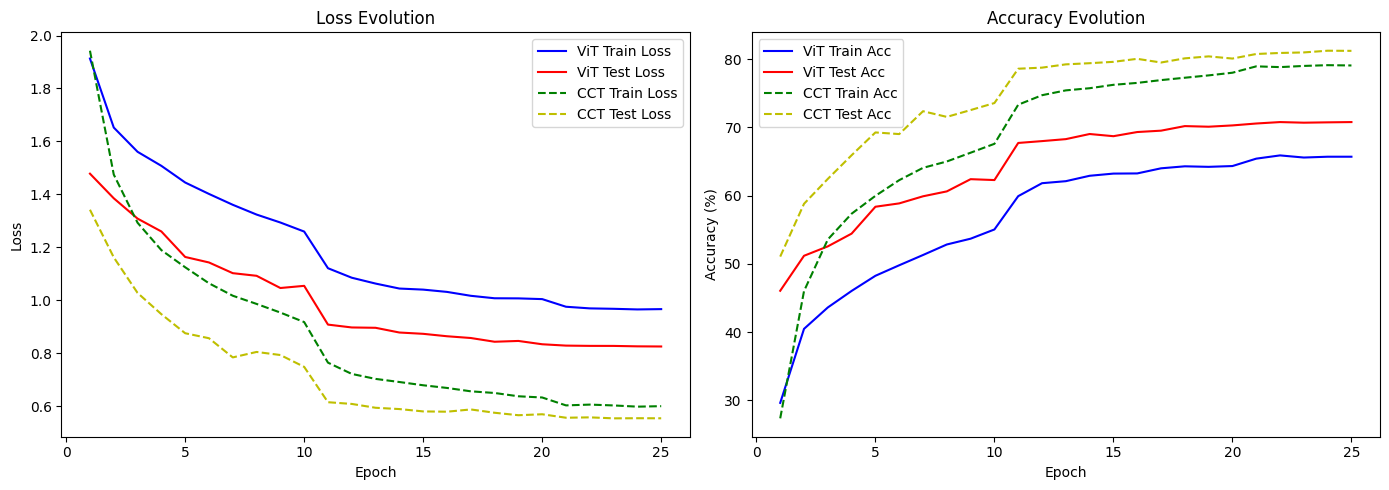

In [4]:
epochs_vit = range(1, len(train_losses_vit) + 1)
epochs_cct = range(1, len(train_losses_cct) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_vit, train_losses_vit, 'b-', label='ViT Train Loss')
plt.plot(epochs_vit, test_losses_vit, 'r-', label='ViT Test Loss')
plt.plot(epochs_cct, train_losses_cct, 'g--', label='CCT Train Loss')
plt.plot(epochs_cct, test_losses_cct, 'y--', label='CCT Test Loss')
plt.title("Loss Evolution")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_vit, train_acc_vit, 'b-', label='ViT Train Acc')
plt.plot(epochs_vit, test_acc_vit, 'r-', label='ViT Test Acc')
plt.plot(epochs_cct, train_acc_cct, 'g--', label='CCT Train Acc')
plt.plot(epochs_cct, test_acc_cct, 'y--', label='CCT Test Acc')
plt.title("Accuracy Evolution")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()